In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data = pd.read_csv("stock_prices.csv", sep=';')
#data[['high', 'low', 'open', 'last']] = data[['high', 'low', 'open', 'last']]
data[['high', 'low', 'open', 'last']] = data[['high', 'low', 'open', 'last']].astype(float)
#data[['high', 'low', 'open', 'last']] = data[['high', 'low', 'open', 'last']].replace(',', '.')
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2508 non-null   datetime64[ns]
 1   instrument  2508 non-null   object        
 2   high        2508 non-null   float64       
 3   low         2508 non-null   float64       
 4   open        2508 non-null   float64       
 5   last        2508 non-null   float64       
 6   volume      2508 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 137.3+ KB


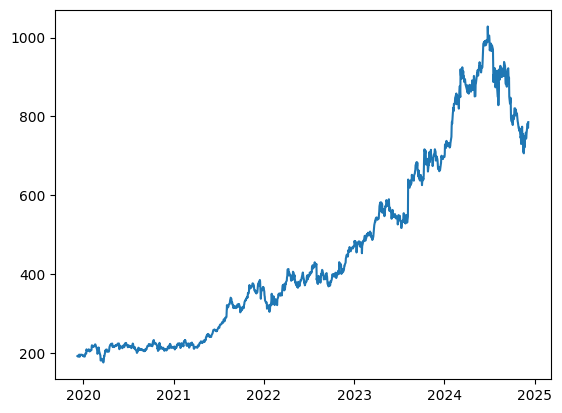

In [ ]:
plt.plot(data[data['instrument'] == 'Novo Nordisk B']['date'], data[data['instrument'] == 'Novo Nordisk B']['last'])
plt.grid()